In [1]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('sample_image.jpg', 0)
print(img.shape)

(2400, 1920)


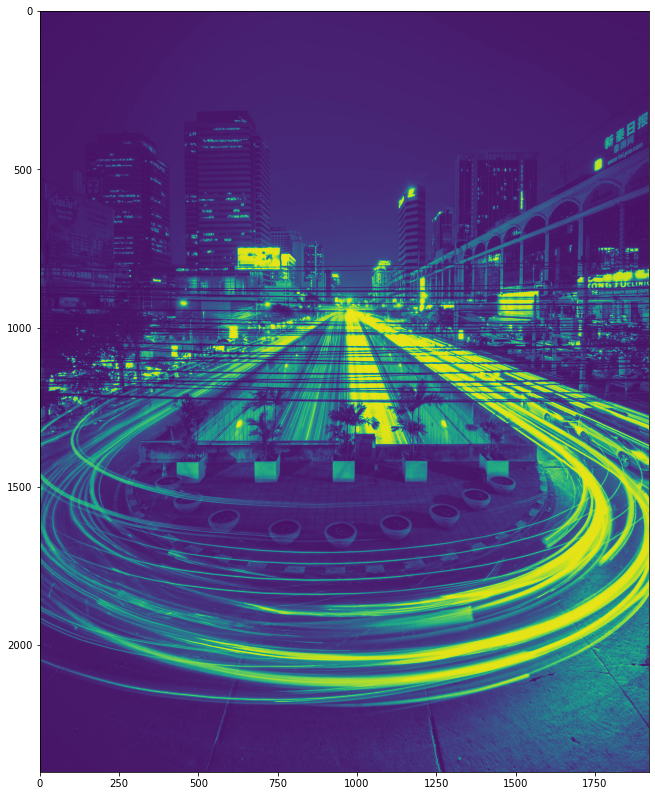

In [41]:
plt.figure(figsize = (14,14))
plt.imshow(img)

## Smooth Filter

In [6]:
# F_SIZE = 9
# PADDING_SIZE = math.floor(F_SIZE/2)
# PADDING_SIZE

def smooth_filter(_img, _f_size):
    padding_size = math.floor(_f_size/2)
    f = (1/_f_size)*np.ones(shape=(_f_size, _f_size))
    new_img = np.ones(shape=_img.shape)
    for ix in range(_img.shape[0]):
        for iy in range(_img.shape[1]):
            if ix < padding_size or iy < padding_size or ix > _img.shape[0] - padding_size - 1\
                or iy > _img.shape[1] - padding_size -1 :
                new_img[ix, iy] = _img[ix, iy]
            else:
                new_img[ix, iy] = np.sum(np.multiply(
                    _img[ix-padding_size:ix+padding_size+1, iy-padding_size:iy+padding_size+1]
                    , f
                ))
    return new_img

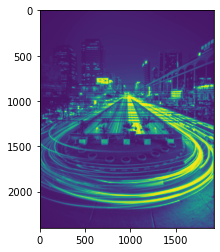

In [7]:
plt.figure(figsize = (14,14))
plt.imshow(smooth_filter(img, 9))

## Median Filter

In [8]:
import random

def add_extreme_noise(_img, rate=0.01):
    new_img = _img.copy()
    for ix in range(_img.shape[0]):
        for iy in range(_img.shape[1]):
            rand = random.random()
            if rand < rate:
                rand2 = random.random()
                if rand2 > 0.5:
                    new_img[ix, iy] = 255
                else:
                    new_img[ix, iy] = 0
    return new_img

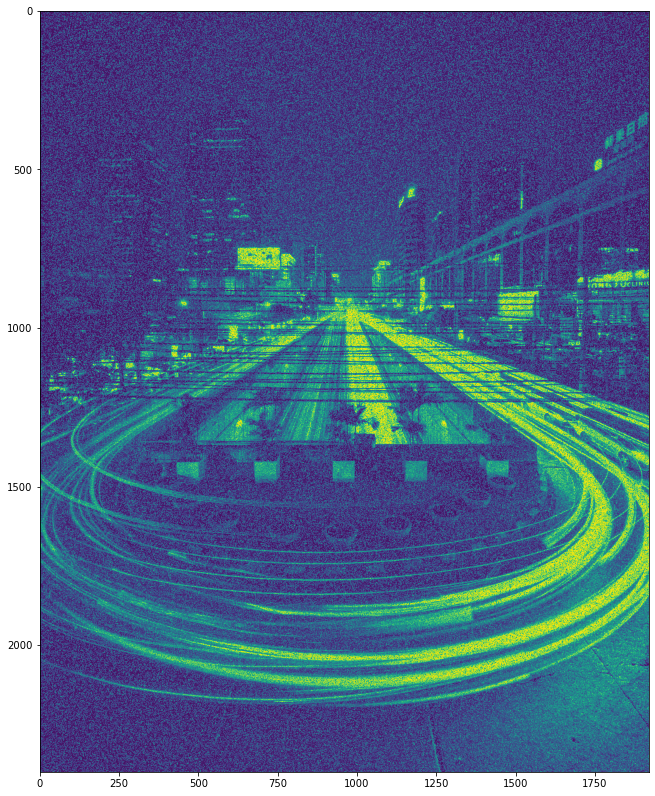

In [19]:
noisy_img = add_extreme_noise(img, 0.2)
plt.figure(figsize = (14,14))
plt.imshow(noisy_img)

In [39]:
def median_filter(_img, _f_size):
    padding_size = math.floor(_f_size/2)
    f = (1/_f_size)*np.ones(shape=(_f_size, _f_size))
    new_img = _img.copy()
    for ix in range(_img.shape[0]):
        for iy in range(_img.shape[1]):
            if ix < padding_size or iy < padding_size or ix > _img.shape[0] - padding_size - 1\
                or iy > _img.shape[1] - padding_size -1:
                continue # more edge case need to be improved
            new_img[ix, iy] = np.median(_img[ix-padding_size:ix+padding_size+1, iy-padding_size:iy+padding_size+1])
    return new_img

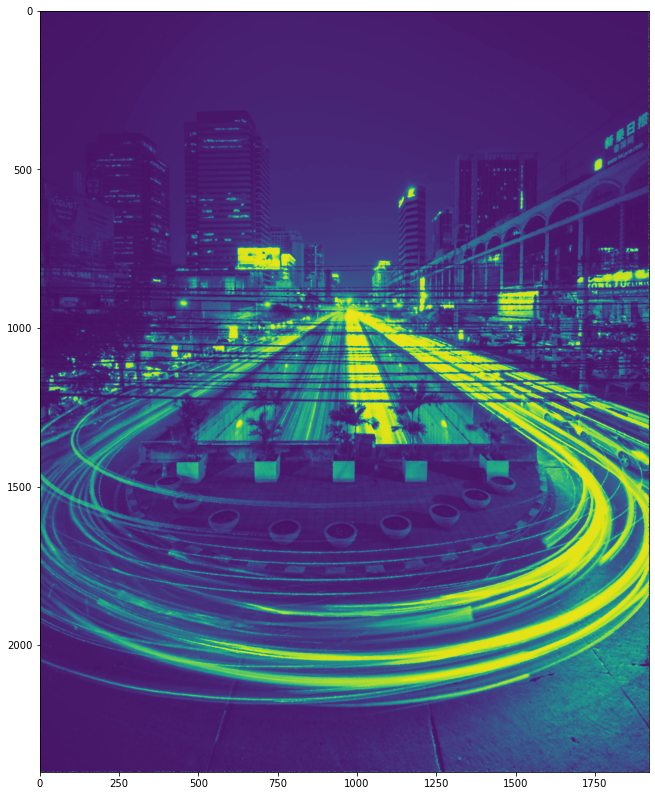

In [44]:
plt.figure(figsize = (14,14))
plt.imshow(median_filter(noisy_img, 5))

## Geometric Distortion

(391, 523)


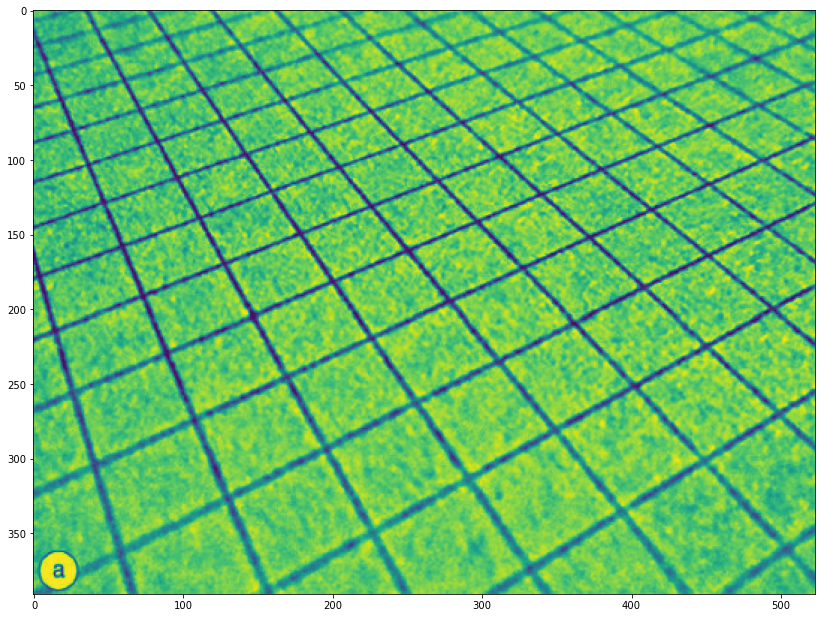

In [57]:
dimg = cv2.imread('distorted_img.png', 0)
print(dimg.shape)
plt.figure(figsize = (14,14))
plt.imshow(dimg)

In [75]:
a = np.array([0, 1, 1, 0])
b = np.array([0, 0, 1, 1])

def geometric_distort_filter(_img, a = np.array([0, 1, 1, 0]), b = np.array([0, 0, 1, 1])):
    new_x_coord = np.zeros(shape=_img.shape, dtype=int)
    for ix in range(_img.shape[0]):
        for iy in range(_img.shape[1]):
            new_x_coord[ix, iy] = a[0] + np.multiply(a[1], ix) + np.multiply(a[2], iy) + np.multiply(a[2], ix*iy)
#             if _new_x_coord < 0 or _new_x_coord > _img.shape[0] - 1:
#                 new_x_coord[ix, iy] = 0
    print(new_x_coord)
    
geometric_distort_filter(dimg)

[[     0      1      2 ...    520    521    522]
 [     1      3      5 ...   1041   1043   1045]
 [     2      5      8 ...   1562   1565   1568]
 ...
 [   388    777   1166 ... 202668 203057 203446]
 [   389    779   1169 ... 203189 203579 203969]
 [   390    781   1172 ... 203710 204101 204492]]


In [69]:
img

array([[198, 197, 192, ..., 149, 153, 162],
       [200, 193, 191, ..., 122, 125, 145],
       [204, 193, 188, ..., 138, 131, 146],
       ...,
       [184, 146, 132, ..., 193, 187, 198],
       [141, 100,  85, ..., 196, 190, 206],
       [133, 112, 103, ..., 207, 201, 214]], dtype=uint8)